# Autocorrelation of chirped Gaussian pulses
$E(t) = \text{exp}[-(\frac{t}{tg})^2(1 + i A)]\text{exp}(i\omega t)$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

In [26]:

l = 800e-9
tg = 100
w = 2*np.pi*3e8 / l
w *= 1e-15
def E(t,A):    
    return np.exp(-((t/tg)**2)*(1 + 1j*A))*np.exp(1j*w*t)

def E1(t = 0,tau = 0,A = 0,A0 = 1,A1 = 1):
    Ex = (A0*np.exp(-(((t-tau)/tg)**2)*(1 + 1j*A))*np.exp(1j*w*(t-tau)) + \
          A1*np.exp(-((t/tg)**2)*(1 + 1j*A))*np.exp(1j*w*t))**2
    Ex = Ex*np.conj(Ex)       
    return Ex

#equation for envelopes

#def I_lower(t = 0,tau = 0,A = 0,A0 = 1,A1 =1):
#    Ex = (A0*np.exp(-(((t-tau)/tg)**2)*(1 + 1j*A))*np.exp(1j*(w*t-np.pi)) + \
#          A1*np.exp(-((t/tg)**2)*(1 + 1j*A))*np.exp(1j*(w*t-np.pi)))**2
#    Ex = Ex*np.conj(Ex)       
#    return Ex

#def I_upper(t = 0,tau = 0,A = 0,A0 = 1,A1 =1):
#    Ex = (A0*np.exp(-(((t-tau)/tg)**2)*(1 + 1j*A))*np.exp(1j*(w*t-2*np.pi)) + \
#          A1*np.exp(-((t/tg)**2)*(1 + 1j*A))*np.exp(1j*(w*t-2*np.pi)))**2
#    Ex = Ex*np.conj(Ex)           
#    return Ex

def I_lower(t,A):
    return 1 + 2*np.exp(-(t/tg)**2) + \
        4*np.exp(-(A**2 + 3*(t/tg)**2)/4.0)*np.cos(A*((t/tg)**2)/2)*np.cos(np.pi) + \
        np.exp(-(1+A**2)*(t/tg)**2)*np.cos(2*np.pi)
        
def I_upper(t,A):
    return 1 + 2*np.exp(-(t/tg)**2) + \
        4*np.exp(-(A**2 + 3*(t/tg)**2)/4.0)*np.cos(A*((t/tg)**2)/2)*np.cos(2*np.pi) + \
        np.exp(-(1+A**2)*(t/tg)**2)*np.cos(2*np.pi)

In [31]:
xmin = -500
xmax = 500
tauArray = np.arange(xmin,xmax,5.0)

def process(A=0):
    f = np.zeros(len(tauArray))
    f_upper = np.zeros(len(tauArray))
    f_lower = np.zeros(len(tauArray))
    for idx,tau in enumerate(tauArray):
        f[idx] = quad(E1,-np.inf,np.inf,args=(tau,A,1,1))[0]
        f_lower[idx] = I_lower(tau,A)
        f_upper[idx] = I_upper(tau,A)
        #f_lower[idx] = quad(I_lower,-np.inf,np.inf,args=(tau,A,1,1))[0]
        #f_upper[idx] = quad(I_upper,-np.inf,np.inf,args=(tau,A,1,1))[0]
    f = (f - np.min(f))/(f[0]-np.min(f))
    #f_upper = (f_upper - np.min(f_upper))/(f_upper[0]-np.min(f_upper))
    #f_lower = (f_lower - np.min(f_lower))/(f_lower[0]-np.min(f_lower))
    return f,f_upper,f_lower

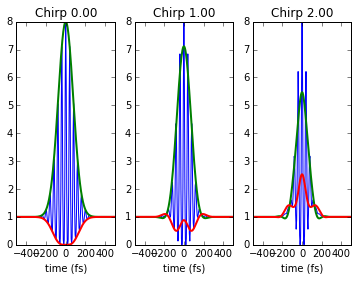

In [67]:
fig = plt.figure()
chirps = np.arange(0,2.01,1.00)
for chirp in chirps:
    f,f_upper,f_lower = process(A=chirp)
    fig.add_subplot(int('1%i%i'%(len(chirps),chirp+1)))
    plt.axis([xmin,xmax,0,8])
    plt.title('Chirp %.2f' %(chirp))
    plt.xlabel('time (fs)')
    plt.plot(tauArray,f)
    plt.plot(tauArray,f_upper,lw=2)
    plt.plot(tauArray,f_lower,lw=2)

#The real and imaginary electric field 

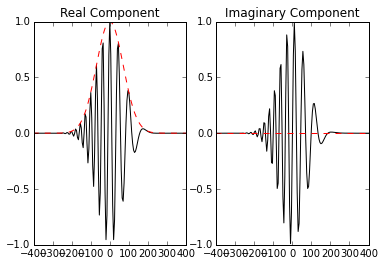

In [5]:
fig = plt.figure()
t = np.arange(-1000,1000,5.0)
tg = 100

fig.add_subplot(121)
plt.title('Real Component')
plt.axis([-400,400,-1,1])
plt.plot(t,np.real(E(t,  3)),lw=1,color='#000000')
plt.plot(t,np.real(np.sqrt(E(t, 3)*np.conj(E(t, 3)))),lw=1,color='#ff0000',ls='dashed')

fig.add_subplot(122)
plt.title('Imaginary Component')
plt.axis([-400,400,-1,1])
plt.plot(t,np.imag(E(t,  3)),lw=1,color='#000000')
plt.plot(t,np.imag(np.sqrt(E(t, 3)*np.conj(E(t,3)))),lw=1,color='#ff0000',ls='dashed')
plt.show()
plt.close()